In [ ]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from matplotlib import pyplot as plt
from google.colab import files
from PIL import Image
import numpy as np

def upload_image():
    uploaded = files.upload()
    for fn in uploaded.keys():
        print(fn)
        img = Image.open(fn)
        img = img.resize((32, 32))
        img_array = np.array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array.astype('float32')
        img_array /= np.max(X_train)
        return img_array

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data() 
num_train, depth, height, width = X_train.shape
num_test = X_test.shape[0] 
class_num = np.unique(y_train).shape[0]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= np.max(X_train)
X_test /= np.max(X_train)

y_train = np_utils.to_categorical(y_train, class_num)
y_test = np_utils.to_categorical(y_test, class_num)

In [ ]:
# quadruple the number of neurons to improve accuracy

model1 = Sequential()
model1.add(Conv2D(8, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(Conv2D(16, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(Conv2D(16, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(Conv2D(32, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(Flatten())
model1.add(Dropout(0.2))
model1.add(Dense(64, kernel_constraint=maxnorm(3)))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(Dense(32, kernel_constraint=maxnorm(3)))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(Dense(class_num))
model1.add(Activation('softmax'))

model2 = Sequential()
model2.add(Conv2D(8, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(16, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
model2.add(Conv2D(16, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Flatten())
model2.add(Dense(64, kernel_constraint=maxnorm(3)))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Dense(32, kernel_constraint=maxnorm(3)))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Dense(class_num))
model2.add(Activation('softmax'))

model3 = Sequential()
model3.add(Conv2D(8, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(BatchNormalization())
model3.add(Conv2D(16, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.5))
model3.add(BatchNormalization())
model3.add(Conv2D(16, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.5))
model3.add(BatchNormalization())
model3.add(Conv2D(32, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(BatchNormalization())
model3.add(Flatten())
model3.add(Dropout(0.5))
model3.add(Dense(64, kernel_constraint=maxnorm(3)))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(BatchNormalization())
model3.add(Dense(32, kernel_constraint=maxnorm(3)))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(BatchNormalization())
model3.add(Dense(class_num))
model3.add(Activation('softmax'))

epochs = 10
optimizer = 'adam'

In [ ]:
%%time

model1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

Epoch 1/10
391/391 [==============================] - 108s 268ms/step - loss: 1.9498 - accuracy: 0.3055 - val_loss: 83.2855 - val_accuracy: 0.1885
Epoch 2/10
391/391 [==============================] - 106s 271ms/step - loss: 1.5628 - accuracy: 0.4337 - val_loss: 116.8196 - val_accuracy: 0.2246
Epoch 3/10
391/391 [==============================] - 105s 270ms/step - loss: 1.4392 - accuracy: 0.4821 - val_loss: 119.4746 - val_accuracy: 0.2495
Epoch 4/10
391/391 [==============================] - 106s 271ms/step - loss: 1.3466 - accuracy: 0.5196 - val_loss: 97.8971 - val_accuracy: 0.2284
Epoch 5/10
391/391 [==============================] - 106s 271ms/step - loss: 1.2705 - accuracy: 0.5505 - val_loss: 110.3391 - val_accuracy: 0.2382
Epoch 6/10
391/391 [==============================] - 107s 273ms/step - loss: 1.2182 - accuracy: 0.5675 - val_loss: 68.2474 - val_accuracy: 0.3015
Epoch 7/10
391/391 [==============================] - 106s 272ms/step - loss: 1.1764 - accuracy: 0.5894 - val_loss:

In [ ]:
%%time

model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

Epoch 1/10
391/391 [==============================] - 95s 234ms/step - loss: 1.4028 - accuracy: 0.5031 - val_loss: 197.4307 - val_accuracy: 0.1489
Epoch 2/10
391/391 [==============================] - 92s 235ms/step - loss: 1.0027 - accuracy: 0.6494 - val_loss: 481.6994 - val_accuracy: 0.1630
Epoch 3/10
391/391 [==============================] - 92s 234ms/step - loss: 0.8441 - accuracy: 0.7024 - val_loss: 578.3418 - val_accuracy: 0.1783
Epoch 4/10
391/391 [==============================] - 93s 238ms/step - loss: 0.7301 - accuracy: 0.7425 - val_loss: 482.4449 - val_accuracy: 0.1440
Epoch 5/10
391/391 [==============================] - 92s 234ms/step - loss: 0.6468 - accuracy: 0.7735 - val_loss: 619.1192 - val_accuracy: 0.1836
Epoch 6/10
391/391 [==============================] - 91s 233ms/step - loss: 0.5721 - accuracy: 0.8009 - val_loss: 619.0215 - val_accuracy: 0.1659
Epoch 7/10
391/391 [==============================] - 92s 236ms/step - loss: 0.5080 - accuracy: 0.8216 - val_loss: 693

In [ ]:
%%time

model3.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

Epoch 1/10
391/391 [==============================] - 138s 274ms/step - loss: 2.3263 - accuracy: 0.1649 - val_loss: 216.2248 - val_accuracy: 0.0999
Epoch 2/10
391/391 [==============================] - 107s 274ms/step - loss: 2.0538 - accuracy: 0.2209 - val_loss: 160.7009 - val_accuracy: 0.1127
Epoch 3/10
391/391 [==============================] - 107s 274ms/step - loss: 1.9245 - accuracy: 0.2637 - val_loss: 150.8953 - val_accuracy: 0.1379
Epoch 4/10
391/391 [==============================] - 107s 274ms/step - loss: 1.8514 - accuracy: 0.2866 - val_loss: 99.8747 - val_accuracy: 0.1780
Epoch 5/10
391/391 [==============================] - 107s 273ms/step - loss: 1.7963 - accuracy: 0.3085 - val_loss: 100.4308 - val_accuracy: 0.1942
Epoch 6/10
391/391 [==============================] - 113s 288ms/step - loss: 1.7649 - accuracy: 0.3245 - val_loss: 51.6900 - val_accuracy: 0.2388
Epoch 7/10
391/391 [==============================] - 107s 274ms/step - loss: 1.7359 - accuracy: 0.3409 - val_loss

In [ ]:
scores1, scores2, scores3 = model1.evaluate(X_test, y_test, verbose=0), model2.evaluate(X_test, y_test, verbose=0), model3.evaluate(X_test, y_test, verbose=0)
print("Model 1 accuracy (dropout = 0.2): %.2f%%" % (scores1[1]*100))
print("Model 2 accuracy (without dropout): %.2f%%" % (scores2[1]*100))
print("Model 3 accuracy (dropout = 0.5): %.2f%%" % (scores3[1]*100))

Model 1 accuracy (dropout = 0.2): 29.45%
Model 2 accuracy (without dropout): 13.84%
Model 3 accuracy (dropout = 0.5): 24.22%


Saving EthicalWelldocumentedBilby-mobile.jpg to EthicalWelldocumentedBilby-mobile (4).jpg
EthicalWelldocumentedBilby-mobile.jpg
1/1 [==============================] - 0s 24ms/step
Model 1 prediction: 6
Model 2 prediction: 0
Model 3 prediction: 0


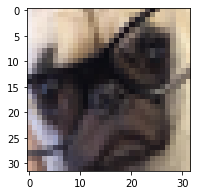

In [ ]:
custom_image = upload_image()

fig = plt.figure(figsize=(3, 3))
plt.imshow((custom_image[0]).astype(np.uint8))

prediction1, prediction2, prediction3 = model1.predict(custom_image).argmax(), model2.predict(custom_image).argmax(), model3.predict(custom_image).argmax()

if prediction1 == 5:
    print('Model 1 prediction:', prediction1, "(this is a dog!)")
else:
    print('Model 1 prediction:', prediction1)

if prediction1 == 5:
    print('Model 2 prediction:', prediction2, "(this is a dog!)")
else:
    print('Model 2 prediction:', prediction2)
    
if prediction1 == 5:
    print('Model 3 prediction:', prediction3, "(this is a dog!)")
else:
    print('Model 3 prediction:', prediction3)